In [11]:
#prac7 :Aim: Write a program to implement k-nearest neighbour algorithm to classify the iris dataset.

# Task-1: Import necessary libraries and load dataset.
# Step – 1: Import required Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step – 2: Load the IRIS Dataset
data = load_iris()
X = data.data
Y = data.target
classes = data.target_names

# Step – 3: Print the head of the dataset
df = pd.DataFrame(X, columns=data.feature_names)
print(df.head())


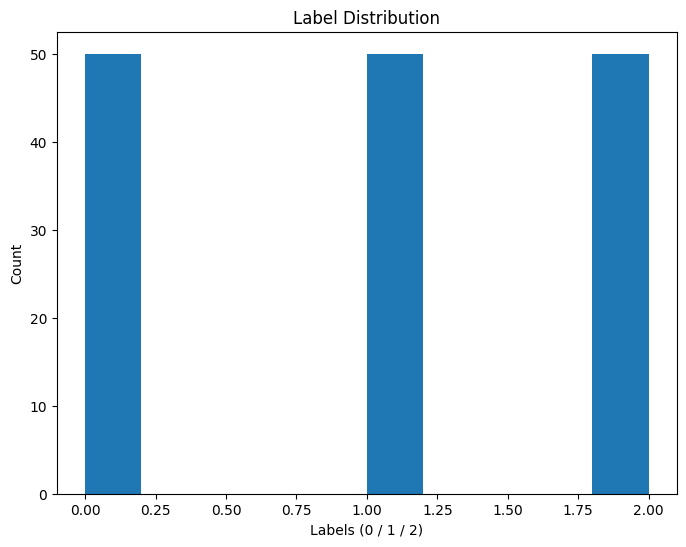

Target 0 is setosa
Target 1 is versicolor
Target 2 is virginica


In [13]:
# Step – 4: Plot the label distribution
plt.figure(figsize=(8, 6))
plt.hist(Y, rwidth=1)
plt.title('Label Distribution')
plt.xlabel('Labels (0 / 1 / 2)')
plt.ylabel('Count')
plt.show()

# Step – 5: Print the target label names
for i, name in enumerate(classes):
    print(f"Target {i} is {name}")


In [14]:
# Step 1: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

# Step 2: Create and train the KNN model
model = KNeighborsClassifier()
model.fit(x_train, y_train)


KNeighborsClassifier()

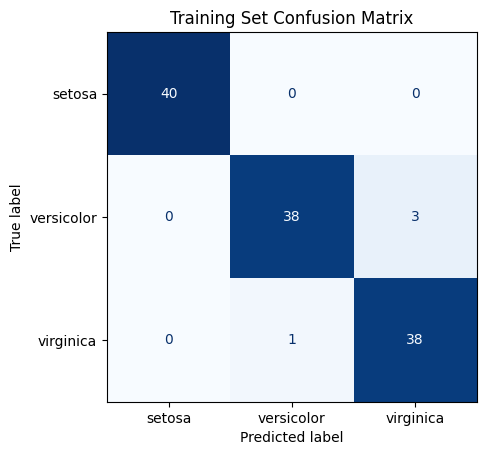

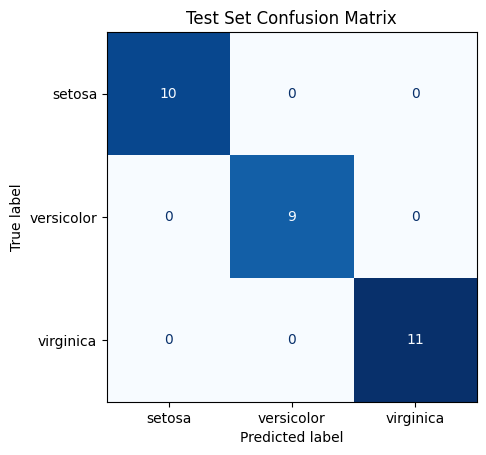

In [15]:
# Step – 1: Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

# Step – 2: Compute and plot the confusion matrix for the training set
confusion_train = confusion_matrix(y_train, y_pred_train)
conf_display_train = ConfusionMatrixDisplay(confusion_train, display_labels=classes)
conf_display_train.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Training Set Confusion Matrix')
plt.show()

# Step – 3: Compute and plot the confusion matrix for the test set
confusion_test = confusion_matrix(y_test, y_pred)
conf_display_test = ConfusionMatrixDisplay(confusion_test, display_labels=classes)
conf_display_test.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Test Set Confusion Matrix')
plt.show()


In [16]:
# Step – 1: Compute and print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=classes, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

# Step – 2: Print the classification report in a tabular format with a border size of 1
from tabulate import tabulate  # Ensure tabulate library is installed
print(tabulate(df_classification_rep, headers='keys', tablefmt='fancy_grid'))


╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ setosa       │           1 │        1 │          1 │        10 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ versicolor   │           1 │        1 │          1 │         9 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ virginica    │           1 │        1 │          1 │        11 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │           1 │        1 │          1 │         1 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │           1 │        1 │          1 │        30 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │           1 │        1 │          1 │        30 │
╘══════════════╧═════════════╧══════════╧════════════╧════════